In [52]:
import pandas as pd
#df = pd.read_csv("cancer.csv") #reads in csv file
df.age = pd.read_csv("cancer.csv", usecols = [0,1,4,5,6,7])
df.age.drop(4) #drop California

,State,Total.Rate,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64
0,Alabama,214.2,2.0,18.5,244.7,1017.8
1,Alaska,128.1,1.7,11.8,170.9,965.2
2,Arizona,165.6,2.5,13.6,173.6,840.2
3,Arkansas,223.9,2.3,17.6,250.1,1048.3
5,Colorado,139.0,1.9,11.7,149.6,849.4
6,Connecticut,190.5,1.6,13.6,163.6,971.2
7,Delaware,210.2,2.2,16.0,217.5,993.3
8,District of Columbia,182.1,0.0,12.4,251.8,1028.6
9,Florida,219.2,2.1,15.9,206.9,901.2
10,Georgia,159.4,2.2,15.7,205.6,932.2


In [53]:
#correlation matrix
df.age.corr()

,Total.Rate,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64
Total.Rate,1.000000,0.187891,0.662638,0.688165,0.790680
Rates.Age.< 18,0.187891,1.000000,0.333553,0.043297,0.041107
Rates.Age.18-45,0.662638,0.333553,1.000000,0.835326,0.499933
Rates.Age.45-64,0.688165,0.043297,0.835326,1.000000,0.660304
Rates.Age.> 64,0.790680,0.041107,0.499933,0.660304,1.000000


Rates.Age.18-45 vs. Total.Rate


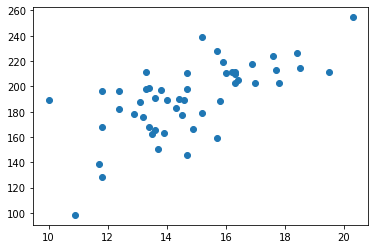

Rates.Age.45-64 vs. Total.Rate


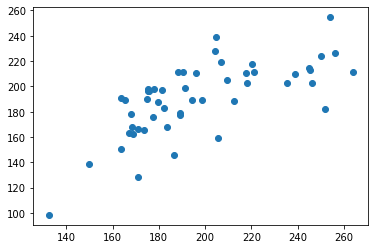

Rates.Age.> 64 vs. Total.Rate


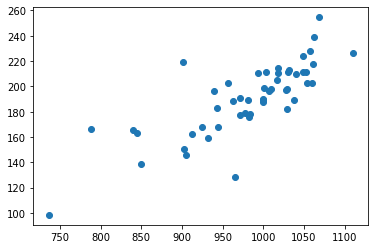

In [54]:
import matplotlib.pyplot as plt

print("Rates.Age.18-45 vs. Total.Rate")
plt.scatter(df["Rates.Age.18-45"], df["Total.Rate"]) #scatter
plt.show()

print("Rates.Age.45-64 vs. Total.Rate")
plt.scatter(df["Rates.Age.45-64"], df["Total.Rate"]) #scatter
plt.show()

print("Rates.Age.> 64 vs. Total.Rate")
plt.scatter(df["Rates.Age.> 64"], df["Total.Rate"]) #scatter
plt.show()

Linear Regression for Rates.Age.> 64 and Total Rate:
Slope: [0.30066999] , Intercept: -104.28506643420926 , Error: 300.41556030333476


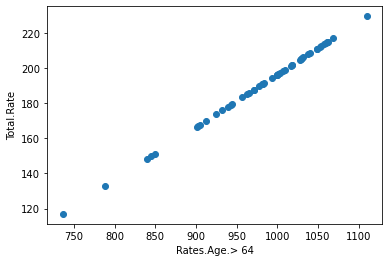

In [55]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("Linear Regression for Rates.Age.> 64 and Total Rate:")
x = np.array(df["Rates.Age.> 64"]).reshape(-1,1)
y = np.array(df["Total.Rate"])
model1 = LinearRegression(fit_intercept=True, normalize=False)
model1.fit(x,y)
#predict new data
y_predict = model1.predict(x)
#slope and intercept and error
print("Slope:", model1.coef_, ", Intercept:", model1.intercept_, ", Error:", metrics.mean_squared_error(y, y_predict))
#step 7, line of best fit
plt.scatter(x,y_predict)
plt.xlabel("Rates.Age.> 64")
plt.ylabel("Total.Rate")
plt.show()